# AntiGranular: How to Access Sensitive Datasets Without Looking At Them

## Introduction

Today, open-source data represents the tip of the world's data iceberg. Most of the world's data is below _the ocean surface_ because of privacy concerns. Imagine if we all could access that great mound of _underwater data_ without any privacy concerns. How would it be if we could create software and tools that enabled us to use that data without violating anyone's privacy?

Strangely, this was a question asked long ago (early 2000s) and many solutions were developed since then. One of the most widely adopted one from these solutions is __differential privacy__ (DP). 

DP is a powerful framework to mask the contributions of individuals in datasets. It ensures that computations performed on sensitive data do not expose any specific information about its participants. Leveraging DP correctly would allow us to work with even the most sensitive datasets like census data without actually looking at individual rows. 

In this article, we will learn how to use differential privacy in practice using a platform called AntiGranular. TODO later

## What is AntiGranular?

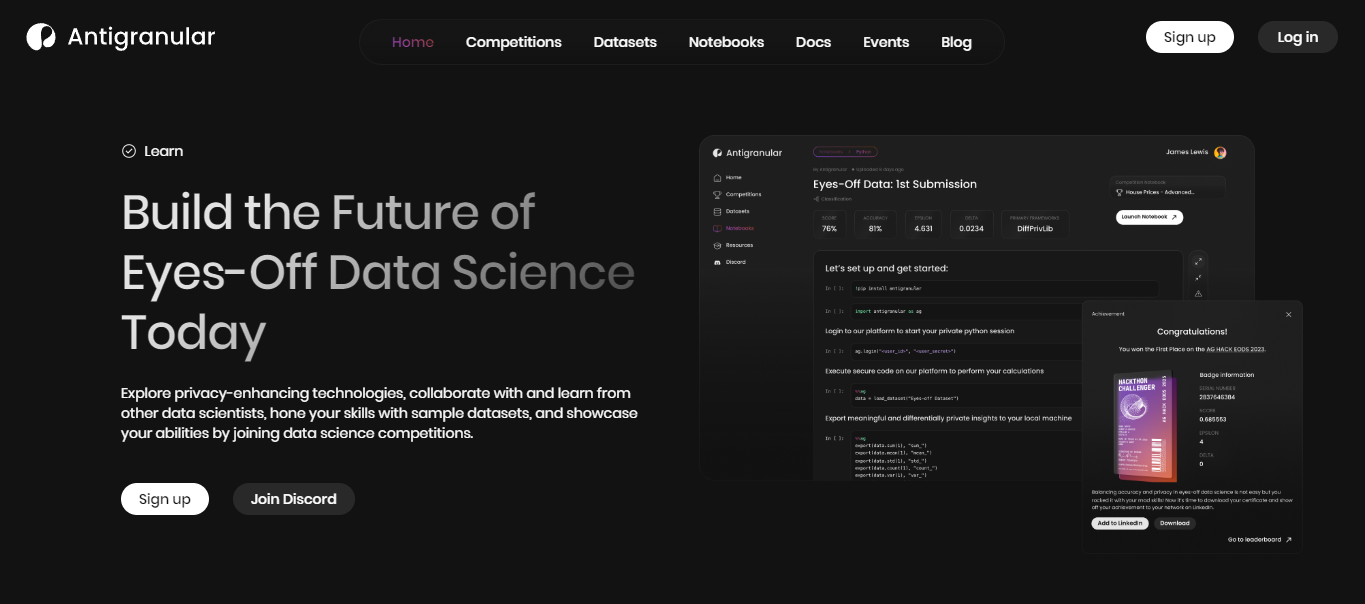

AntiGranular is a Kaggle-like competition platform with a twist: instead of using open-source or publicly available data, participants are given sensitive datasets to solve a machine learning challenge.

The data itself is protected by the AntiGranular platform using differential privacy, so competitors can't actually access or _look_ at the data. All they can do is use privacy-aware functions to aggregate and analyze the data within a secure environment. and train machine learning models.

At the beginning of competitions, participants are a privacy budget. To win, participants must develop the most accurate model that uses the least amount privacy budget. The more privacy budget they use, the more likely their solution is prone to privacy attacks. 

Due to extra challenge these competitions offer, AG is already hosting challenges by some big names like Harvard and the United Nations. But, for all these things to make sense, we have to learn a bit more about differential privacy.

## Data needs privacy...

In November, OpenAI announced custom GPTs in a thinly veiled attempt to access private datasets of others. Their premise was "Give us your data and we will create a chat bot off of it". 

As you might've seen, that didn't work out so well: certain sneaky smart users were able to pull the training data of custom GPTs with such simple prompts as "let me download the file". 

There was also an official paper that showed how to extract private information about real people (address, names, emails, you name it) using a stupid prompt and a couple hundred bucks. 

If we go a little back, Netflix was sued by four of its users because their information was leaked to the general public during a Kaggle competition ([Netflix Prize](https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data)) despite the best privacy safeguards. The streaming platform had to pay a settlement for an undisclosed amount and cancel any future Netflix Prize competitions.

If these examples couldn't convince you of the importance of data privacy, I can come up with more worrying cases. 

An employee leaves for a competitor with a snapshot of the database from his old workplace. A hotel data analyst stumbles upon the information of their ex-partner and where they are having a holiday with their new partner. A new intern in some bank accidentally publicizes a private database, revealing personal financial details of high-profile clients. 

These are fictitious scenarios for sure but it takes only one bad apple from the corporate basket to cost millions in lawsuits for companies. Therefore, the data world needs the highest form of privacy safeguards it can afford.

## How does differential privacy solve this "problem"?

Differential privacy (DP) is a robust framework to protect the privacy of individuals during data projects. DP algorithms draw calibrated noise from probability distributions and inject them into datasets. This helps mask individual contributions and preserve overall trends. 

The two key parameters of DP framework is __epsilon__ and __delta__, which quantify the level of protection offered by an algorithm. 

1. __Epsilon (ε)__:
    - Epsilon is a parameter that measures the privacy budget or the level of privacy protection offered by a differentially private algorithm.
    - A smaller value of epsilon indicates a stronger guarantee of privacy. A low epsilon value means that the chance of revealing sensitive information about any individual from the output of the algorithm is minimized.
    - A higher epsilon value allows for more flexibility in data analysis but might lead to less stronger privacy protection.
    - Mathematically, a smaller value of epsilon corresponds to a tighter bound on the amount of information that any single individual's data can contribute to the output of the algorithm.
2. __Delta (δ)__:
    - Delta is an additional parameter used in some DP definitions, specifically when dealing with algorithms that have a small probability of deviating from perfect privacy.
    - A smaller delta value implies a lower probability of privacy breach by adversaries.
    - A higher delta value indicates otherwise. 
    - Typically, algorithms are designed to have an extremely small delta to ensure that the probability of any privacy breach remains , especially in sensitive or high-stakes scenarios.

Combined, these parameters allow for a trade-off between data utility (usefulness of data analysis) and privacy preservation. Make these parameters too conservative and you may end up with a dataset filled with noise. Let them breathe a little and you may loosen the level of protection on your sensitive dataset. It is important to strike this balance based on your unique scenario.

## But how do we feed the data?

OK, even if we have algorithms that strictly follow the Epsilon-Delta definition of differential privacy, how do we feed them our sensitive data without any third parties or even the dataset owners themselves peeking under the covers?

That's where Trusted Execution Environments (TEEs) come into play. TEEs are revolutionary tools pushing the boundaries of what is possible in cloud computing. 

You can think of a TEE as a tough box. You can touch the box, pass it around, shake it or roll it but there is absolutely no way you can look inside. In other words, a TEE is a secure cloud environment or sections of machines that guarantees the protection of data and code loaded inside. This guarantee even works against individuals with higher admin privileges running the environment. 

If you combine confidential computing tools such as TEEs with differential privacy guidelines, you got yourself a privacy policy to brag to others.

And AntiGranular lets you do just that.

## How does AntiGranular let you practice DP?

Even though AG is a competition platform with sensitive datasets, their purpose is to promote "Eyes-off data science". In other words, they want to push the boundaries of privacy-first data science by providing a fun environment for privacy enthusiasts to build their own DP algorithms or use existing solutions. 

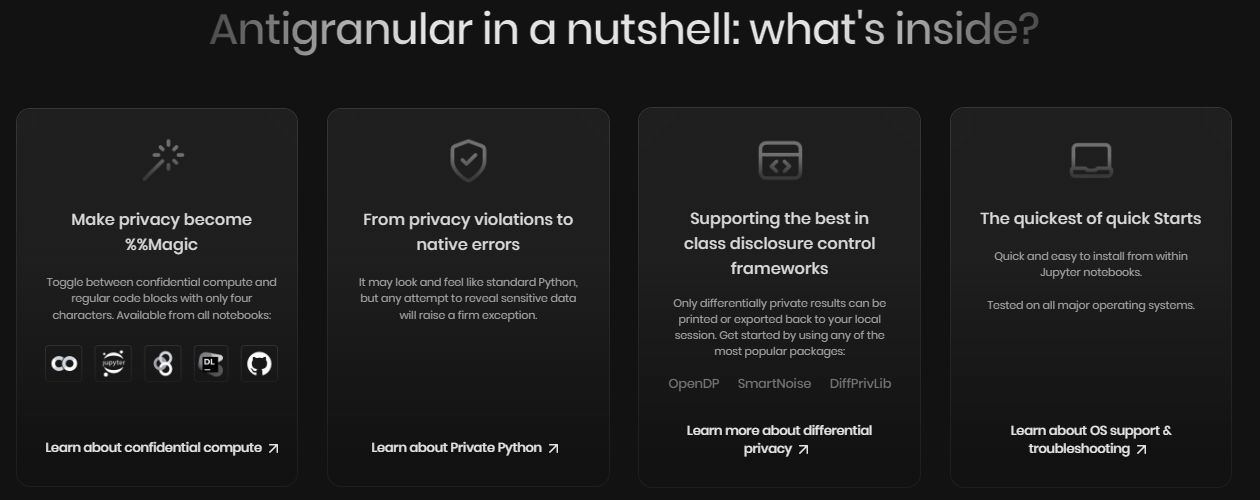

Here are the steps you can follow to get started:

__1. Choose a competition.__

You can choose any of the ongoing or past competitions on the platform that spark your interest. Afterward, read the background behind the challenge and learn about the dataset, scoring metrics of AG and how the leaderboard works.

__2. Install the `antigranular` Python package. __

In Jupyter environments, the package provides you with an `%%ag` cell magic. Any cell that contains this magic will be run on a secure environment (TEE) that contains a special instance of Private Python offered by AG. Private Python and the `antrigranular` package are the defining features of AG. With them, you have access to a TEE containing sensitive data in the cloud and your local assets relevant to the project - all in a single notebook.

__3. Connect to a dataset.__

Each dataset page on AG (whether part of a competition or from the datasets tab) has a code snippet in the upper right corner to connect to the TEE containing the dataset. A successful login through `antrigranular` exposes the `%%ag` magic in your notebook.

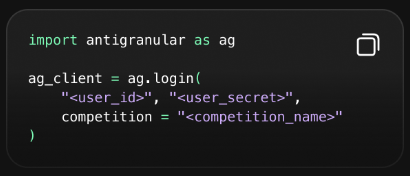

__4. Mix and match.__

Inside `%%ag` cells, perform any data analysis or machine learning task with the differentially private libraries provided by the Private Python runtime (see the full list below). Then, you can export the results of your operations as local variables. 

For example, you can perform a GroupBy operation with `op_pandas` and export the results locally to visualize with Matplotlib.

__5. Climb the leaderboard.__

Incrementally build solutions that use the least amount of privacy budget (epsilon) but still have high accuracy. Keep in mind all other issues you have learned from regular machine learning challenges like bias and variance.

## What kind of libraries does Antigranular support?

- As mentioned earlier, any tool or algorithm used on sensitive data must follow the guidelines of differential privacy
- AntiGranular is very meticulous when it comes to these guidelines so that when a company entrusts its data to the platform to host a competition, there is no privacy breach by participants
- So, AntiGranular doesn't support the vast majority of open-source tools you are used to. Good-bye, Scikit-learn, XGBoost, TensorFlow...
- But, it does support Pandas and a few other prominent libraries created by differential privacy community:
    - `op_pandas`: A wrapper library around Pandas (on top of regular Pandas) specifically designed for privacy-aware data manipulations
    - `op_diffprivlib`: A differentially private machine learning library with a Scikit-learn like API. It contains differentially private versions of such algorithms as random forests, linear regression, logistic regression, naive bayes and PCA.
    - `op_snsql`: a library to run differentially private SQL queries
    - `op_recordlinkage`: The original `recordlinkage` Python toolkit has powerful methods for data deduplication and record linkage. This one is the differentially private version.
You can see the full list [here](https://docs.antigranular.com/private-python/quickstart-guides/qs_antigranular#libraries-supported).

Using these four steps, you can already build many powerful machine learning solutions. Yes, the tiny amount of libraries AG offers may not seem any good compared to the thousands in the open-source community. However, you have to remember that the tools AG offers can already solve classification and regression problems.

The machine learning world may have all its attention on LLMs right now, but the world of supervised-learning is still going strong. Tabular classification and regression still remains one of the most frequent problems companies implement machine learning solutions for. And it is time to make those solutions differentially private.

## How does AntiGranular combine all these components?